# Data Exploration

*make many plots quickly for yourself to see what you have*

* boxplot
* histogram
* bar plot of missing values
* correlation heatmap
* scatterplot
* scatterplot matrix
* bar plot (1 or 2 categories)

more on pandas on [https://krother.github.io/pandas_go_to_space/](https://krother.github.io/pandas_go_to_space/)

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset("penguins")
df.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

### Box Plot

In [4]:
df["bill_length_mm"].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

<AxesSubplot: >

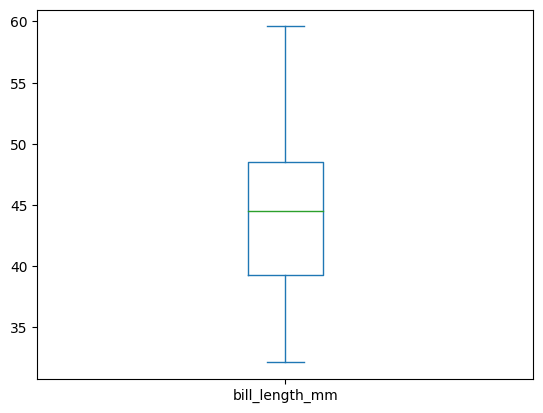

In [5]:
# df[col_name].plot.box()
df["bill_length_mm"].plot.box()

### Histogram

<AxesSubplot: ylabel='Frequency'>

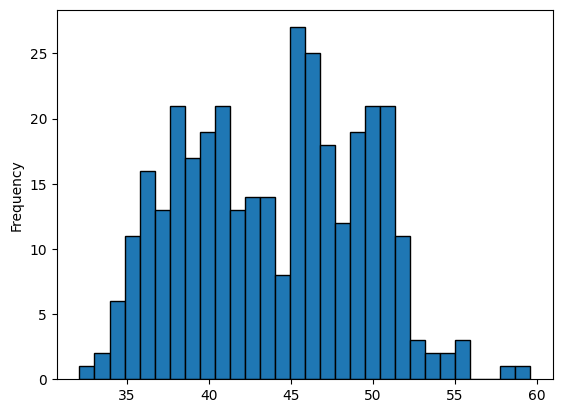

In [11]:
df["bill_length_mm"].plot.hist(bins=30, edgecolor="black")

### Check for missing values

<AxesSubplot: >

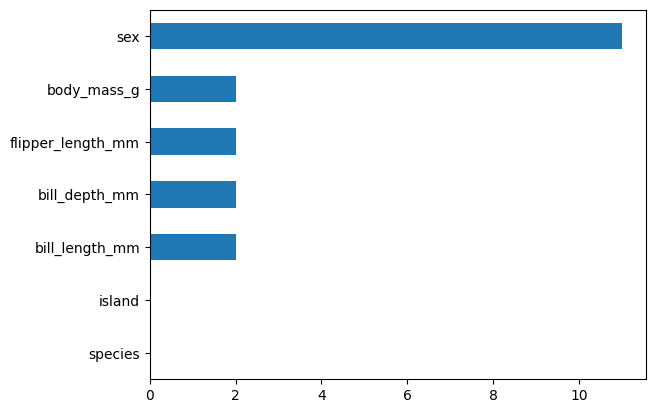

In [15]:
df.isna().sum().plot.barh()

<AxesSubplot: >

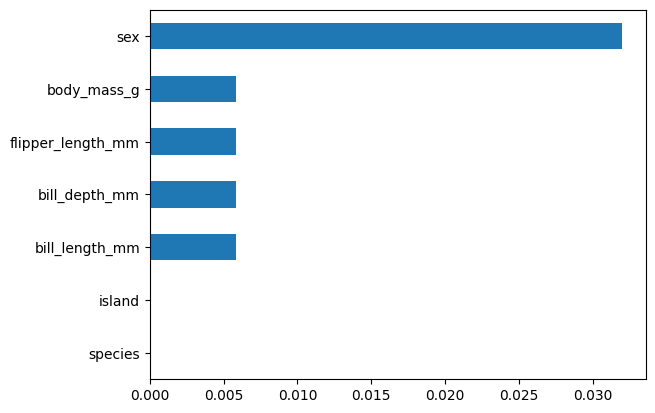

In [18]:
# calculate relative frequency of missing values
normalized = df.isna().sum() / df.shape[0]
normalized.plot.barh()

### Correlation Heatmap

In [22]:
# calculate correlation coefficients
df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

<AxesSubplot: >

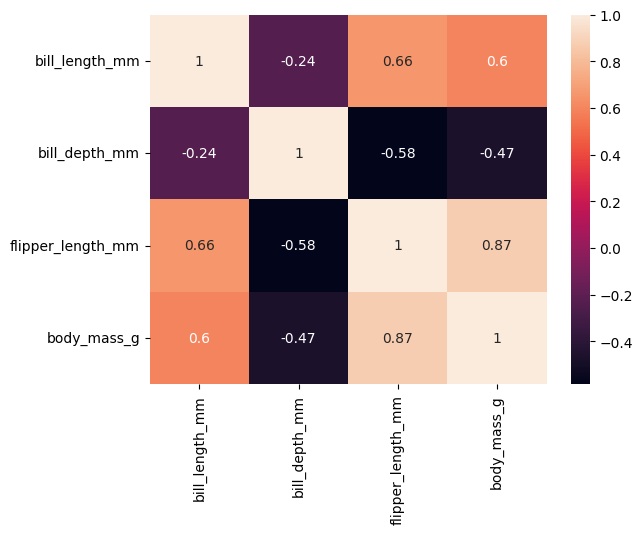

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Scatter plot
*examine detailed relationship of two columns*

<AxesSubplot: xlabel='bill_depth_mm', ylabel='body_mass_g'>

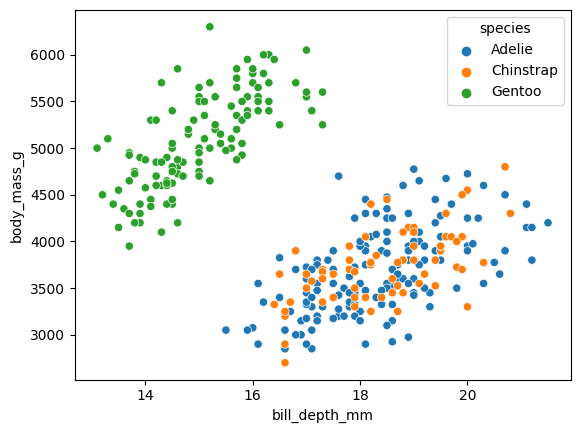

In [25]:
# we see: Simpsons paradox
sns.scatterplot(data=df, 
                x="bill_depth_mm", y="body_mass_g",
                hue="species")

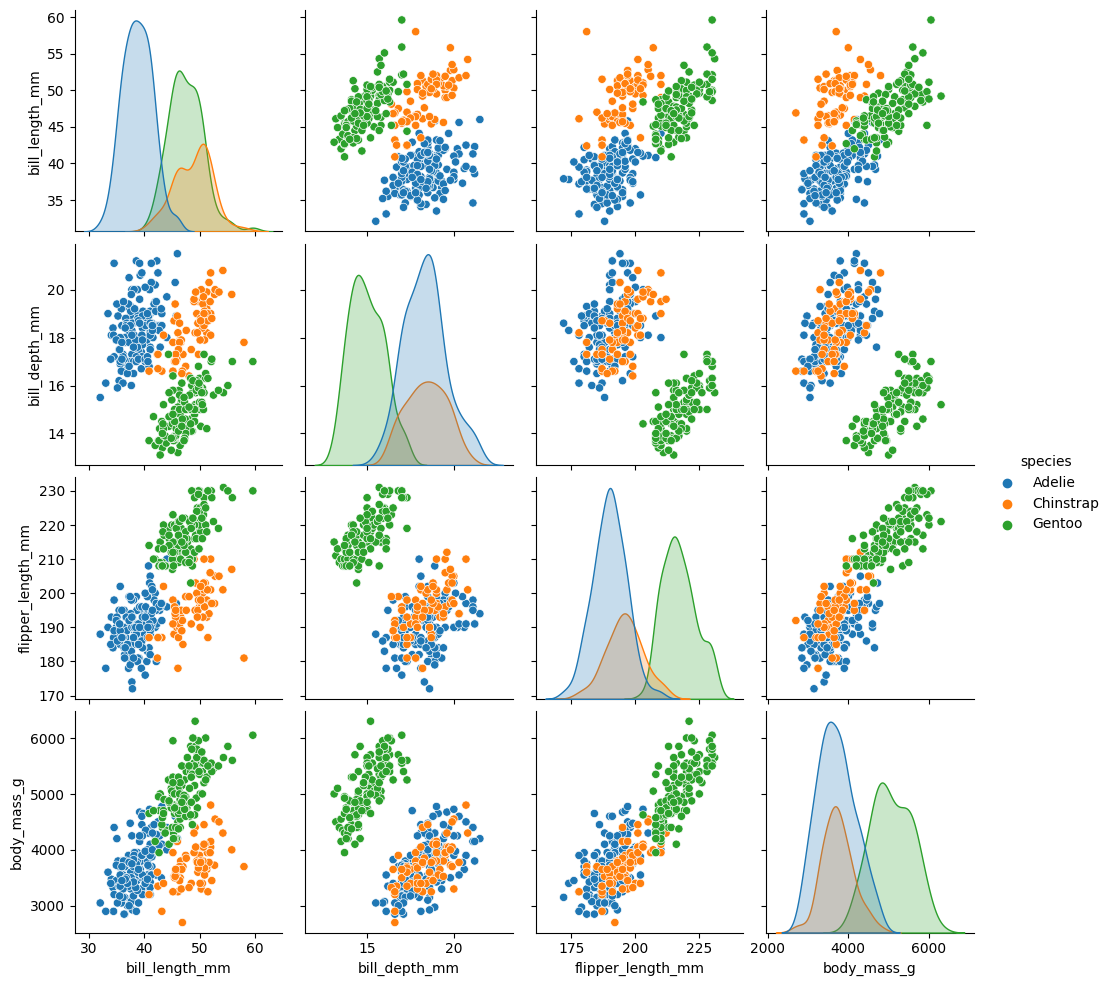

In [27]:
sns.pairplot(df, hue="species")

### Bar plot
*check categories, e.g. if they are balanced*

<AxesSubplot: xlabel='species'>

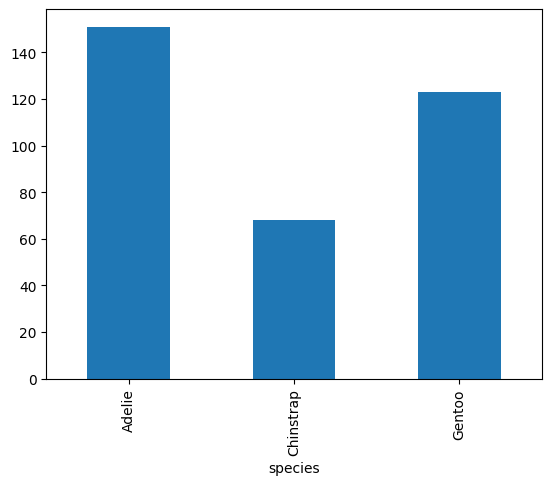

In [31]:
# aggregation: replace .count try mean(), std(), median(), min(), max()
df.groupby("species")["body_mass_g"].count().plot.bar()

In [36]:
# aggregate all combinations of two categories
# (crosstab or pivot table)
pivot = df.groupby(["sex", "species"])["body_mass_g"].count().unstack()
pivot

species  Adelie  Chinstrap  Gentoo
sex                               
Female       73         34      58
Male         73         34      61

<AxesSubplot: xlabel='sex'>

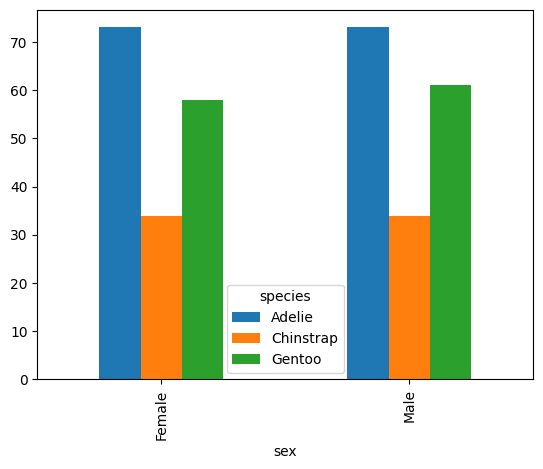

In [37]:
pivot.plot.bar()